# Data processing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import os
plt.style.use('norm.mplstyle')

### Special case

In [6]:
# list of Ls
Ls14 = np.array([6, 8, 10, 12, 14])
Ls16 = np.array([6, 8, 10, 12, 14, 16])

# Page values
ents_page14 = 0.5 * Ls14 * np.log(2) - 0.5
ents_page16 = 0.5 * Ls16 * np.log(2) - 0.5

ents_num_cat14 = np.array([1.5461801436697864, 2.148251378790473,
                           2.8890219167655466, 3.6105380431301954,
                           4.320707542224891])

# numerical results with cat state effect
ents_num_bulk_nocat14 = []
for L in Ls14:
    with open(f'data/03-21-2023-special-case/special-case-bulk-nocat-{L}.pkl', 'rb') as f:
        obj = pickle.load(f)
    ents_num_bulk_nocat14.append(obj['ent_num'])
ents_num_bulk_nocat14 = np.asarray(ents_num_bulk_nocat14)

# numerical results without cat state effect
ents_num_edge_nocat16 = []
for L in Ls16:
    with open(f'data/03-21-2023-special-case/special-case-edge-nocat-{L}.pkl', 'rb') as f:
        obj = pickle.load(f)
    ents_num_edge_nocat16.append(obj['ent_num'])
ents_num_edge_nocat16 = np.asarray(ents_num_edge_nocat16)

# numerical results without cat state effect + real random coefficients
ents_num_edge_nocat_real16 = []
for L in Ls14:
    with open(f'data/03-21-2023-special-case/special-case-edge-nocat-real-{L}.pkl', 'rb') as f:
        obj = pickle.load(f)
    ents_num_edge_nocat_real16.append(obj['ent_num'])
ents_num_edge_nocat_real14 = np.asarray(ents_num_edge_nocat_real16)

ents_th14 = 0.5 * (Ls14 - 1) * np.log(2) - 0.25
ents_th16 = 0.5 * (Ls16 - 1) * np.log(2) - 0.25
                    
deltas_num_cat14 = ents_page14 - ents_num_cat14
deltas_num_bulk_nocat14 = ents_page14 - ents_num_bulk_nocat14
deltas_num_edge_nocat16 = ents_page16 - ents_num_edge_nocat16
deltas_num_edge_nocat_real14 = ents_page14 - ents_num_edge_nocat_real14
deltas_th16 = ents_page16 - ents_th16

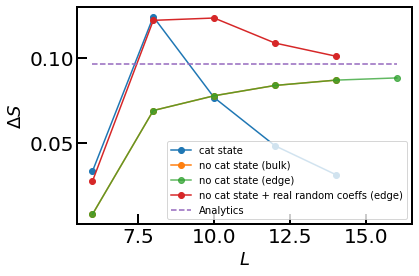

In [7]:
fig, ax = plt.subplots()
ax.plot(Ls14, deltas_num_cat14, '-o', label='cat state')
ax.plot(Ls14, deltas_num_bulk_nocat14, '-o', label='no cat state (bulk)')
ax.plot(Ls16, deltas_num_edge_nocat16, '-o', alpha=0.75, label='no cat state (edge)')
ax.plot(Ls14, deltas_num_edge_nocat_real6, '-o', label='no cat state + real random coeffs (edge)')
ax.plot(Ls16, deltas_th16, '--', label='Analytics')
ax.set_xlabel('$L$')
ax.set_ylabel('$\Delta S$')
ax.legend()
fig.savefig('delta_s.jpg', bbox_inches='tight')

### Special case (dynamite)

In [2]:
Ls_Nv1000_beta10 = np.array([8, 16, 18, 20, 22])

deltaS_num_Nv1000_beta10 = []
for L in Ls_Nv1000_beta10:
    data = np.load(f'data/03-22-2023-sp-case-dnm/L{L}_Nv1000_beta10.npy.npz')
    deltaS_num_Nv1000_beta10.append(data['arr_0'])
deltaS_num_Nv1000_beta10 = np.asarray(deltaS_num_Nv1000_beta10)

# deltas_th_Nv1000_beta10 = 0.5 * (Ls_Nv1000_beta10 - 1) * np.log(2) - 0.25
deltas_th_Nv1000_beta10 = (0.5 * np.log(2) - 0.25) * np.ones_like(Ls_Nv1000_beta10)

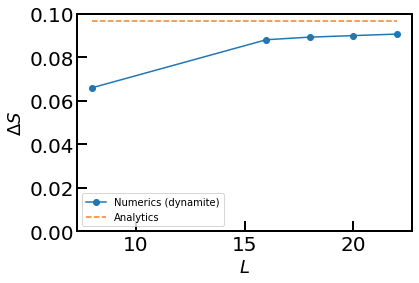

In [3]:
fig, ax = plt.subplots()
ax.plot(Ls_Nv1000_beta10, deltaS_num_Nv1000_beta10, '-o', label='Numerics (dynamite)')
ax.plot(Ls_Nv1000_beta10, deltas_th_Nv1000_beta10, '--', label='Analytics')
ax.set_xlabel('$L$')
ax.set_ylabel('$\Delta S$')
ax.set_ylim(0.0, 0.1)
ax.legend()
fig.savefig('delta_S_sp_dnm.jpg', bbox_inches='tight')

### Special case (power method) (sparse matrix multiplication)

In [15]:
# list of Ls
Ls = np.array([6, 8, 10, 12, 14, 16])

# Page curve values
ents_page = 0.5 * Ls * np.log(2) - 0.5

# numerical values
ent_num_Ls = []
time_Ls = []
iter_Ls = []
for L in Ls:
    with open(f'/n/home01/ytan/scratch/deviation-max-ee/data/04-10-2023-sp_case_pw_mthd/sp_case_pw_mthd_{L}.pkl', 'rb') as f:
        obj = pickle.load(f)
    time_Ls.append(obj['time'])
    ent_num_Ls.append(obj['ent_num'])
    iter_Ls.append(obj['iter'])

# time_Ls = np.asarray(times)
# ent_num_Ls = np.asarray(ents_num)
# iter_Ls = np.asarray(iter_Ls)

ents_th = 0.5 * (Ls - 1) * np.log(2) - 0.25
                    
delta_num_Ls = ents_page - ent_num_Ls
delta_th = (ents_page - ents_th)[0]

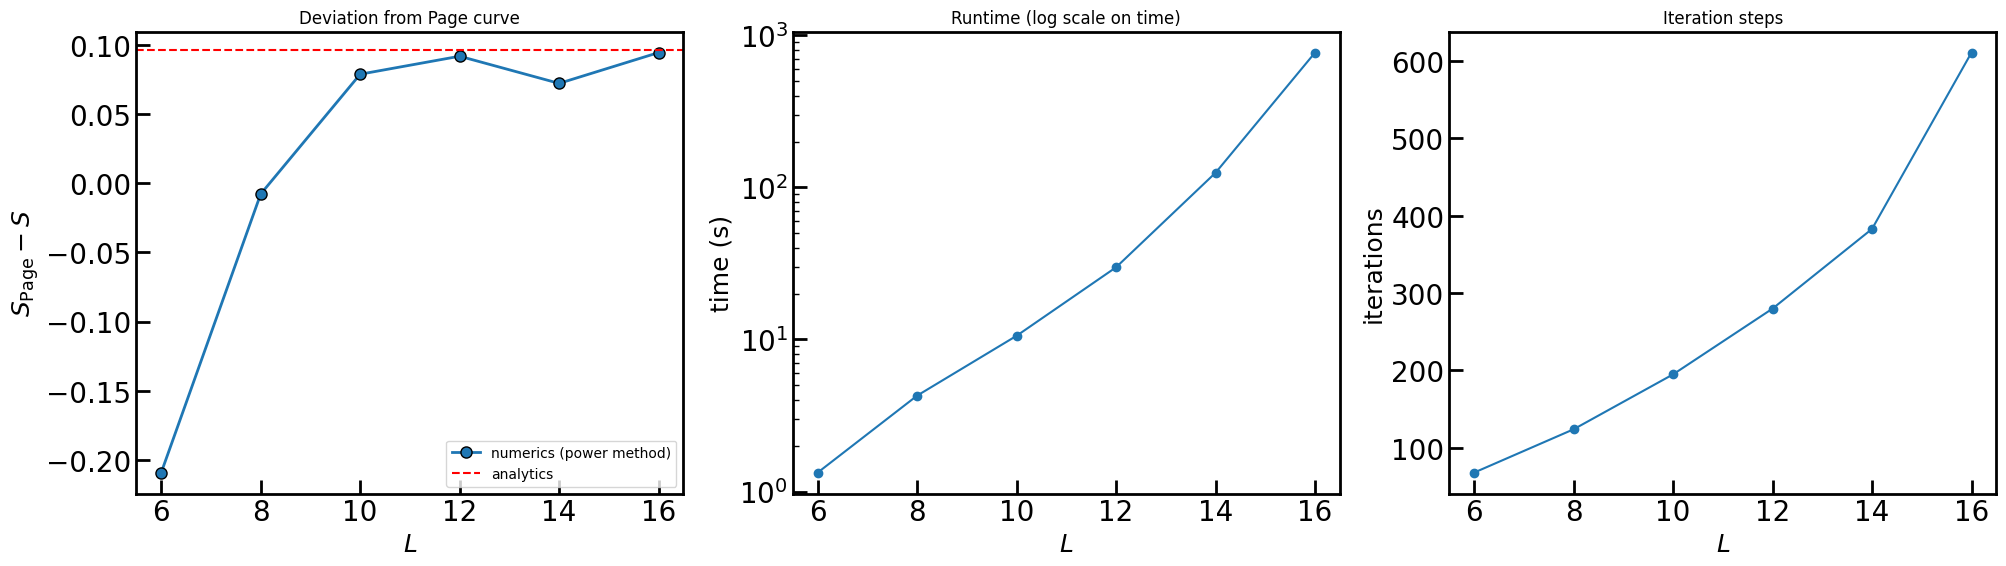

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
# delta S plot
ax[0].plot(Ls, delta_num_Ls, linewidth=2, marker='o', markersize=8, markeredgecolor='black', label='numerics (power method)')
ax[0].axhline(delta_th, color='r', linestyle='--', label='analytics')
ax[0].set_xlabel('$L$')
ax[0].set_ylabel(r'$S_\mathrm{Page}-S$')
ax[0].set_xticks(Ls)
ax[0].legend()
ax[0].set_title('Deviation from Page curve')
# runtime plot
ax[1].plot(Ls, time_Ls, '-o')
ax[1].set_xlabel('$L$')
ax[1].set_yscale('log')
ax[1].set_ylabel('time (s)')
ax[1].set_xticks(Ls)
ax[1].set_title('Runtime (log scale on time)')
# iteration plot
ax[2].plot(Ls, iter_Ls, '-o')
ax[2].set_xlabel('$L$')
ax[2].set_ylabel('iterations')
ax[2].set_xticks(Ls)
ax[2].set_title('Iteration steps')
fig.savefig('fig_special_case_power_method.jpg', bbox_inches='tight')

### Special case (power method) (tensors.net)

In [3]:
# list of Ls
Ls = np.array([6, 8, 10, 12, 14, 16, 18, 20, 22])

# Page curve values
ents_page = 0.5 * Ls * np.log(2) - 0.5

# numerical values
ent_num_Ls = []
ent_num_max_Ls = []
ent_num_min_Ls = []

time_Ls = []

iter_Ls = []
iter_max_Ls = []
iter_min_Ls = []

for L in Ls:
    with open(f'/n/home01/ytan/scratch/deviation-max-ee/data/04-10-2023-sp_case_pw_mthd_tensorsnet/sp_case_pw_mthd_{L}.json', 'r') as f:
        data = json.load(f)
    time_Ls.append(data['time'])
    
    ent_num_Ls.append(data['ent_num'])
    ent_nums = data['ent_nums']
    ent_num_max_Ls.append(np.max(ent_nums))
    ent_num_min_Ls.append(np.min(ent_nums))
    
    iter_Ls.append(data['iter'])
    iters = data['iters']
    iter_max_Ls.append(np.max(iters))
    iter_min_Ls.append(np.min(iters))

# time_Ls = np.asarray(times)
# ent_num_Ls = np.asarray(ents_num)
# iter_Ls = np.asarray(iter_Ls)

ents_th = 0.5 * (Ls - 1) * np.log(2) - 0.25
                    
delta_num_Ls = ents_page - ent_num_Ls
delta_num_max_Ls = ents_page - ent_num_min_Ls
delta_num_min_Ls = ents_page - ent_num_max_Ls
delta_th = (ents_page - ents_th)[0]

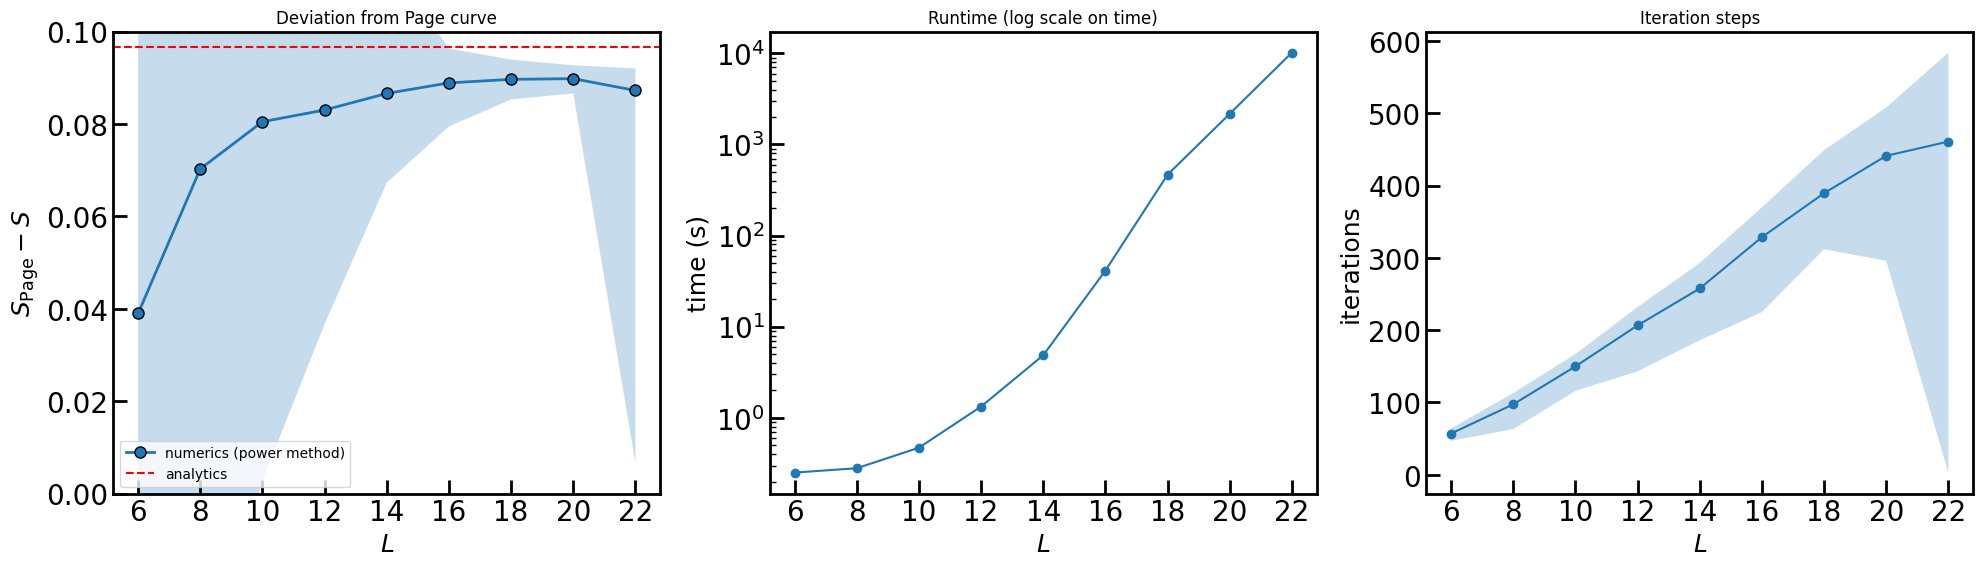

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
# delta S plot
ax[0].plot(Ls, delta_num_Ls, linewidth=2, marker='o', markersize=8, markeredgecolor='black', label='numerics (power method)')
ax[0].fill_between(Ls, delta_num_min_Ls, delta_num_max_Ls, alpha=0.25)
ax[0].axhline(delta_th, color='r', linestyle='--', label='analytics')
ax[0].set_xlabel('$L$')
ax[0].set_ylabel(r'$S_\mathrm{Page}-S$')
ax[0].set_xticks(Ls)
ax[0].set_ylim([0.0, 0.1])
ax[0].legend()
ax[0].set_title('Deviation from Page curve')
# runtime plot
ax[1].plot(Ls, time_Ls, '-o')
ax[1].set_xlabel('$L$')
ax[1].set_yscale('log')
ax[1].set_ylabel('time (s)')
ax[1].set_xticks(Ls)
ax[1].set_title('Runtime (log scale on time)')
# iteration plot
ax[2].plot(Ls, iter_Ls, '-o')
ax[2].fill_between(Ls, iter_min_Ls, iter_max_Ls, alpha=0.25)
ax[2].set_xlabel('$L$')
ax[2].set_ylabel('iterations')
ax[2].set_xticks(Ls)
ax[2].set_title('Iteration steps')
fig.savefig('imgs/fig_special_case_power_method_tensorsnet.jpg', bbox_inches='tight')

### Local chaotic (Lanczos)

In [22]:
# list of Ls
Ls = np.array([6, 8, 10, 12])

# Page curve values
ents_page = 0.5 * Ls * np.log(2) - 0.5

# numerical values
ents_num = []
times = []
for L in Ls:
    with open(f'/n/home01/ytan/scratch/deviation-max-ee/data/03-29-2023-xxz_mklicz_ed_lanczos/03-29-2023_xxz_mklicz_ed_lanczos{L}.pkl', 'rb') as f:
        obj = pickle.load(f)
    ents_num.append(obj['ent_num'])
    times.append(obj['time'])
ents_num = np.asarray(ents_num)
times = np.asarray(times)

ents_th = 0.5 * (Ls - 1) * np.log(2) - 0.25
                    
deltas_num = ents_page - ents_num
deltas_th = ents_page - ents_th

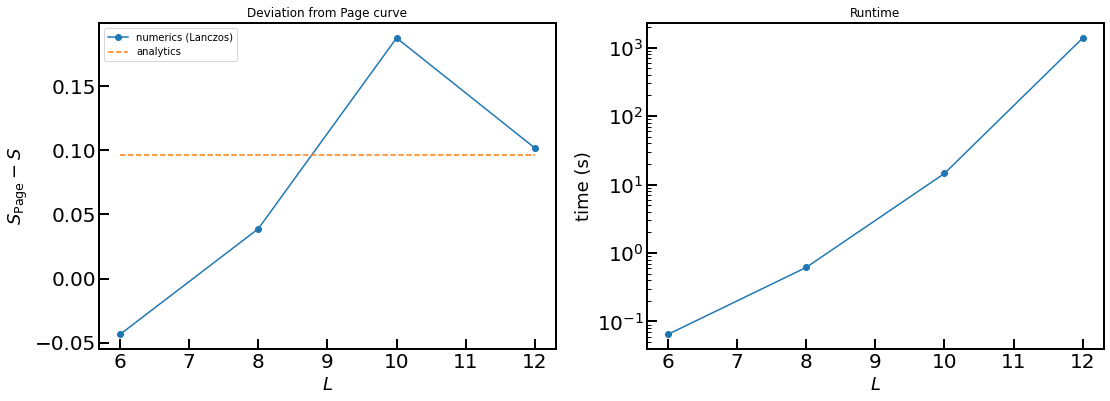

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].plot(Ls, deltas_num, '-o', label='numerics (Lanczos)')
ax[0].plot(Ls, deltas_th, '--', label='analytics')
ax[0].set_xlabel('$L$')
ax[0].set_ylabel(r'$S_\mathrm{Page}-S$')
ax[0].legend()
ax[0].set_title('Deviation from Page curve')
ax[1].plot(Ls, times, '-o')
ax[1].set_xlabel('$L$')
ax[1].set_yscale('log')
ax[1].set_ylabel('time (s)')
ax[1].set_title('Runtime')
fig.savefig('delta_s_local_chaotic.jpg', bbox_inches='tight')

### Local chaotic (power method)

In [3]:
# list of Ls
Ls = np.array([6, 8, 10])

# Page curve values
ents_page = 0.5 * Ls * np.log(2) - 0.5

# numerical values
ents_num = []
times = []
iters = []
for L in Ls:
    with open(f'/n/home01/ytan/scratch/deviation-max-ee/data/04-03-2023-special_case_power_method/special_case_power_method_{L}.pkl', 'rb') as f:
        obj = pickle.load(f)
    ents_num.append(obj['ent_num'])
    times.append(obj['time'])
    iters.append(obj['iter'])
ents_num = np.asarray(ents_num)
times = np.asarray(times)
iters = np.asarray(iters)

ents_th = 0.5 * (Ls - 1) * np.log(2) - 0.25
                    
deltas_num = ents_page - ents_num
delta_th = (ents_page - ents_th)[0]

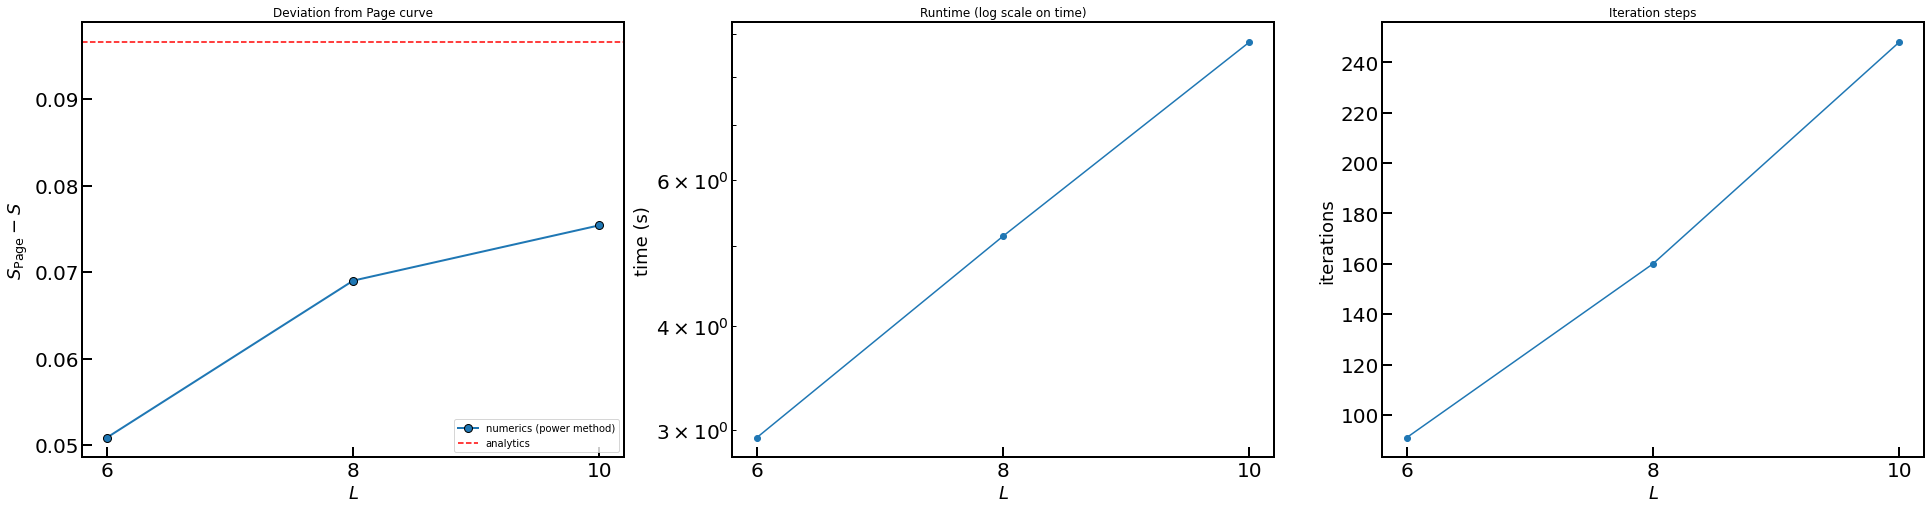

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(33, 8))
# delta S plot
# ax[0].plot(Ls, deltas_num, linewidth=2, label='numerics (power method)')
ax[0].plot(Ls, deltas_num, linewidth=2, marker='o', markersize=8, markeredgecolor='black', zorder=10, label='numerics (power method)')
ax[0].axhline(delta_th, color='r', linestyle='--', label='analytics')
ax[0].set_xlabel('$L$')
ax[0].set_ylabel(r'$S_\mathrm{Page}-S$')
ax[0].set_xticks(Ls)
ax[0].legend()
ax[0].set_title('Deviation from Page curve')
# runtime plot
ax[1].plot(Ls, times, '-o')
ax[1].set_xlabel('$L$')
ax[1].set_yscale('log')
ax[1].set_xticks(Ls)
ax[1].set_ylabel('time (s)')
ax[1].set_title('Runtime (log scale on time)')
# iteration plot
ax[2].plot(Ls, iters, '-o')
ax[2].set_xlabel('$L$')
ax[2].set_ylabel('iterations')
ax[2].set_xticks(Ls)
ax[2].set_title('Iteration steps')
fig.savefig('fig_xxz_mklicz_power_method.jpg', bbox_inches='tight')

### Mixed field Ising (dynamite imaginary time evolution)

10
12
14
26


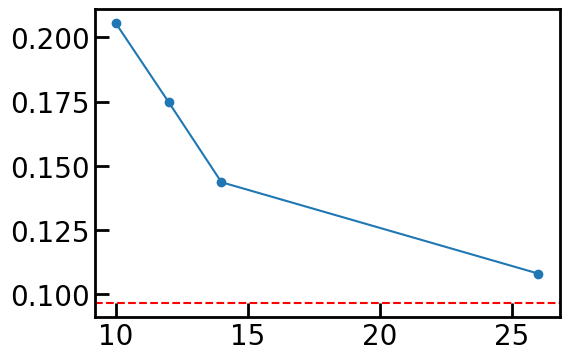

In [4]:
Ls = np.array([10, 12, 14, 26])
datadir = '/n/home01/ytan/scratch/deviation-max-ee/data/05-08-2023-mixfld_ising_dnm_imagevol/'
import os
if not os.path.exists(datadir):
    raise NotADirectoryError(f'{datadir} does not exist')
# seeds = range(4, 5)
ents_page = (Ls / 2) * np.log(2) - 0.5
diff_th = 0.5 * np.log(2) - 0.25

times_avg = []

diffs_avg = []
diffs_max = []
diffs_min = []
for i, L in enumerate(Ls):
    print(L)
    ents_num = []
    # for seed in seeds:
    if L == 26:
        seed = 0
    else:
        seed = 4
    datafile = os.path.join(datadir, f'L{L}_beta10_seed{seed}.npz')
    data = np.load(datafile)
    ents_num.append(data['ent_num'].item())
    

    ent_avg = np.mean(ents_num)
    ent_max = np.max(ents_num)
    ent_min = np.min(ents_num)

    diff_avg = ents_page[i] - ent_avg
    diff_max = ents_page[i] - ent_min
    diff_min = ents_page[i] - ent_max

    diffs_avg.append(diff_avg)
    diffs_max.append(diff_max)
    diffs_min.append(diff_min)

fig, ax = plt.subplots(1, 2)
ax[0].axhline(diff_th, color='r', linestyle='--', label='analytics')
ax[0].plot(Ls, diffs_avg, '-o', label='numerics (dynamite)')
ax[0].fill_between(Ls, diffs_min, diffs_max, alpha=0.25)

ax[1].plot(Ls, times_avg, '-o')

In [2]:
test = []
# data = np.load('data/04-27-2023-mixfld_ising_dnm_imagevol/L14_beta10_seed5.npz')
# # list(data.keys())
# data['ent_num'].item()
# data = np.load('data/04-27-2023-mixfld_ising_dnm_imagevol/L14_beta10_seed8.npz')
# data['ent_num'].item()
# test.append(data['ent_num'].item())

Ls = np.array([10, 12, 14])
# seeds = range(31)
for L in Ls:
# for seed in seeds:
    data = np.load(f'data/05-08-2023-mixfld_ising_dnm_imagevol/L{L}_beta10_seed4.npz')
    test.append(data['ent_num'].item())